# Task 5 — Image Classification using MNIST

## Objective
Build an image classification model using:
- Traditional ML (Logistic Regression)
- Deep Learning (CNN)

Also perform preprocessing, evaluation, and comparison.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'cv2'

In [1]:
!pip install opencv-python

   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/40.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/40.2 MB 8.9 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/40.2 MB 9.2 MB/s eta 0:00:04
   ------ --------------------------------- 6.8/40.2 MB 10.0 MB/s eta 0:00:04
   -------- ------------------------------- 8.9/40.2 MB 9.9 MB/s eta 0:00:04
   ----------- ---------------------------- 11.3/40.2 MB 10.4 MB/s eta 0:00:03
   -------------- ------------------------- 14.2/40.2 MB 10.8 MB/s eta 0:00:03
   ---------------- ----------------------- 16.5/40.2 MB 10.8 MB/s eta 0:00:03
   ------------------- -------------------- 19.1/40.2 MB 11.0 MB/s eta 0:00:02
   --------------------- ------------------ 21.2/40.2 MB 11.0 MB/s eta 0:00:02
   ----------------------- ---------------- 23.9/40.2 MB 11.1 MB/s eta 0:00:02
   ------------------------- -------------- 25.7/40.2 MB 10.9 MB/s eta 0:00:0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.datasets import mnist

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.8 MB 1.4 MB/s eta 0:03:58
   ---------------------------------------- 0.8/331.8 MB 1.3 MB/s eta 0:04:07
   ---------------------------------------- 1.0/331.8 MB 1.3 MB/s eta 0:04:10
   ---------------------------------------- 1.3/331.8 MB 1.4 MB/s eta 0:03:57
   ---------------------------------------- 1.6/331.8 MB 1.4 MB/s eta 0:03:49
   ---------------------------------------- 1.8/331.8 MB 1.5 MB/s eta 0:03:44
   ---------------------------------------- 1.8/331.8 MB 1.5 MB/s eta 0:03:44
   ---------------------------------------- 2.1/331.8 MB 1.1 MB/s eta 0:04:53
   ---------------------------------------- 2.1/331.8 MB 1.1 MB/s eta 0:04:53
   ---------------------------------------- 2.1/331.8 MB 1.1 MB/s eta 0:04:53
   ---------------------------------------- 2.1/331.8 MB 1.1 MB/s eta 0:04:53


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


In [3]:
# Normalize pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [4]:
# Flatten images
X_train_flat = X_train.reshape(len(X_train), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Use subset for faster training
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_flat[:10000], y_train[:10000])

lr_preds = lr_model.predict(X_test_flat)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr_preds))

Logistic Regression Accuracy: 0.9044


In [5]:
cnn_model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=5,
    validation_split=0.2
)

C:\Users\Admn\anaconda3\envs\nlp_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9495 - loss: 0.1672 - val_accuracy: 0.9769 - val_loss: 0.0757
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9815 - loss: 0.0585 - val_accuracy: 0.9812 - val_loss: 0.0631
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9844 - val_loss: 0.0550
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9818 - val_loss: 0.0586
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9834 - val_loss: 0.0639


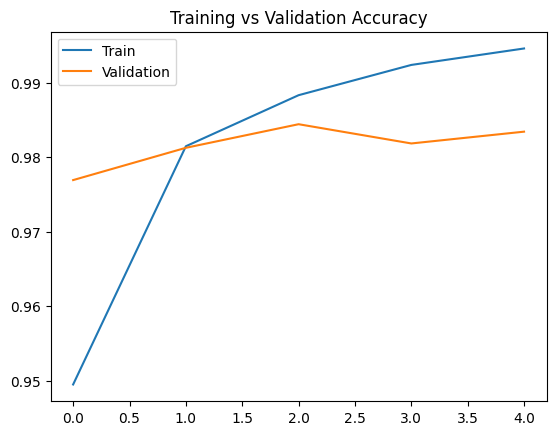

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.legend(["Train","Validation"])
plt.show()

In [7]:
cnn_loss, cnn_acc = cnn_model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", cnn_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9845 - loss: 0.0542
CNN Accuracy: 0.984499990940094


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


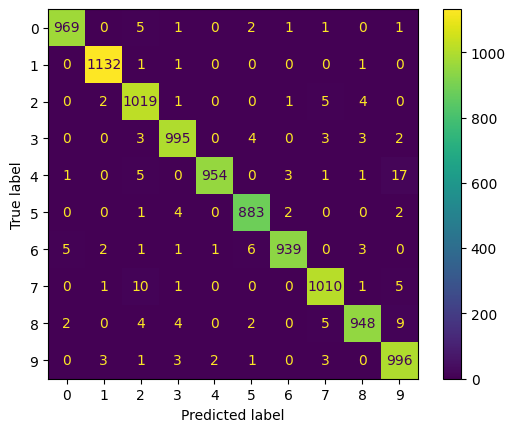

In [8]:
cnn_preds = np.argmax(cnn_model.predict(X_test_cnn),axis=1)

ConfusionMatrixDisplay.from_predictions(y_test, cnn_preds)
plt.show()

In [9]:
import cv2
cv2.imwrite("sample_digit.png", X_train[0]*255)

True

In [10]:
Task5/image_processing/

SyntaxError: invalid syntax (203941699.py, line 1)

In [11]:
cnn_model.save("../notebooks/cnn_model.h5")